[**Dataset**](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

In [20]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Upload del csv + display
path = "https://raw.githubusercontent.com/lucaonnis25/dati/main/SeoulBikeData.csv"
df = pd.read_csv(path, encoding='latin-1', sep=",")
display(df)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [21]:
# # Inizio analisi sui dati # #

# Check per vedere se ci sono valori null nel df
display(df.isnull().any())

# Cambio dei valori 0 nella colonna 'Hour' con valore 24
df["Hour"] = np.where(df["Hour"] == 0, 24, df["Hour"])

# converto le date in un formato Date ed ottengo informazioni utili sul giorno, sul mese e sull'anno
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['giorno'] = df['Date'].dt.day_name()
df["mese"] = df['Date'].dt.month_name()
df["anno"] = df['Date'].map(lambda x: x.year).astype("object")

display(df)

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254    24             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  giorno      mese  anno  
0     No Holiday             Yes  Friday  December  2017  
1     No Holiday             Yes  Friday  December  2017  
2     No Holiday             Yes  Friday  December  2017  
3     No Holiday             Yes  Friday  December  2017  
4     No Holiday             Yes  Friday  December  2017  
...          ...             ...     ...       ...   ...  
8755  No Holiday             Yes  Friday  November  2018  
8756  No Holiday             Yes  Friday  November  2018  
8757  No Holiday             Yes  Friday  November  2018  
8758  No Holiday             Yes  Friday  November  2018  
8759  No Holiday             Yes  Friday  November  2018  

[8760 rows x 17 columns]

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



In [22]:
# # # Continuo l'analisi sui dati # # #

# # Eliminazione delle tabelle

#df = df.drop(["Dew point temperature(°C)"], axis=1)     #
#df = df.drop(["Solar Radiation (MJ/m2)"],axis =1)       #
#df = df.drop(["Wind speed (m/s)"], axis = 1)            #
#df = df.drop(["Seasons"], axis = 1)                     #

# Check dei dati rimanenti
df.describe()

# Estraggo solo i dati dalla colonna target con un valore diverso da 0
df = df[df['Rented Bike Count'] != 0]

# Estrazione dei dati ed inserimento in array specifici
rented = df["Rented Bike Count"].to_numpy()

# date = df["Date"].to_numpy()
#seasons = df["Seasons"].to_numpy()             #
temperature = df["Temperature(°C)"].to_numpy()
ora = df["Hour"].to_numpy()
giorno = df["giorno"].to_numpy()
mese = df["mese"].to_numpy()
anno = df["anno"].to_numpy()
holiday = df["Holiday"].to_numpy()
umidità = df["Humidity(%)"].to_numpy()
visibilità = df["Visibility (10m)"].to_numpy()
neve = df["Snowfall (cm)"].to_numpy()
#radiazione_solare = df["Solar Radiation (MJ/m2)"].to_numpy()        #
#punto_rugiada = df["Dew point temperature(°C)"].to_numpy()          #
#functioning_day = df["Functioning Day"].to_numpy()                  #
#wind_speed = df["Wind speed (m/s)"].to_numpy()                      #
#pioggia = df["Rainfall(mm)"].to_numpy()

# Check per vedere se la colonna 'Date' è ancora presente nel df. Se trova dei record li elimina
if "Date" in df.columns:
    df = df.drop(["Date"], axis=1)

# # Split del df originario in due df specifici (df variabili numeriche e df variabili categoriche) # #

# variabili_numeriche = [rented, temperature, umidità, visibilità, punto_rugiada, radiazione_solare, neve, wind_speed]
variabili_numeriche = pd.DataFrame({
    "Rented Bike Count": rented,
    "Temperature(°C)": temperature,
    "Humidity(%)": umidità,
    "Visibility (10m)": visibilità,
#    "Dew point temperature(°C)": punto_rugiada,             #
#    "Solar Radiation (MJ/m2)": radiazione_solare,           #
    "Snowfall (cm)": neve,
#    "Wind speed (m/s)": wind_speed,                         #
    "Hour":ora,
#    "Rainfall(mm)":pioggia
})

variabili_categoriche = pd.DataFrame({
    'Holiday': holiday,
    'Giorno': giorno,
    'Mese': mese,
    'Anno': anno,
#    'Seasons': seasons,                                     #
#    'Functioning Day': functioning_day                      #
})


display(df)

display(variabili_numeriche)
display(variabili_categoriche)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254    24             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  giorno  \
0              0.0            0.0  Winter  No Holiday             Yes  Friday   
1              0.0            0.0  Winter  No Holiday             Yes  Friday   
2              0.0            0.0  Winter  No Holiday             Yes  Friday   
3              0.0            0.0  Winter  No Holiday             Yes  Friday   
4              0.0            0.0  Winter  No Holiday             Yes  Friday   
...            ...            ...     ...         ...             ...     ...   
8755           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8756           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8757           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8758           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8759           0.0            0.0  Autumn  No Holiday             Yes  Friday   

          mese  anno  
0     December  2017  
1     December  2017  
2     December  2017  
3     December  2017  
4     December  2017  
...        ...   ...  
8755  November  2018  
8756  November  2018  
8757  November  2018  
8758  November  2018  
8759  November  2018  

[8465 rows x 16 columns]

Rented Bike Count  Temperature(°C)  Humidity(%)  Visibility (10m)  \
0                   254             -5.2           37              2000   
1                   204             -5.5           38              2000   
2                   173             -6.0           39              2000   
3                   107             -6.2           40              2000   
4                    78             -6.0           36              2000   
...                 ...              ...          ...               ...   
8460               1003              4.2           34              1894   
8461                764              3.4           37              2000   
8462                694              2.6           39              1968   
8463                712              2.1           41              1859   
8464                584              1.9           43              1909   

      Snowfall (cm)  Hour  
0               0.0    24  
1               0.0     1  
2               0.0     2  
3               0.0     3  
4               0.0     4  
...             ...   ...  
8460            0.0    19  
8461            0.0    20  
8462            0.0    21  
8463            0.0    22  
8464            0.0    23  

[8465 rows x 6 columns]

Holiday  Giorno      Mese  Anno
0     No Holiday  Friday  December  2017
1     No Holiday  Friday  December  2017
2     No Holiday  Friday  December  2017
3     No Holiday  Friday  December  2017
4     No Holiday  Friday  December  2017
...          ...     ...       ...   ...
8460  No Holiday  Friday  November  2018
8461  No Holiday  Friday  November  2018
8462  No Holiday  Friday  November  2018
8463  No Holiday  Friday  November  2018
8464  No Holiday  Friday  November  2018

[8465 rows x 4 columns]

In [23]:
# # # Controllo come sono distribuiti i dati sulla base della colonna Holiday # # #
# L'idea è quella di vedere se nei periodi festivi sono state affittate più o meno bici rispetto ai periodi non festivi #

# Numero di occorrenze di "No Holiday" nella colonna "Holiday"
conteggio_no_holiday = df['Holiday'].value_counts()['No Holiday']
print("Numero di No Holiday:", conteggio_no_holiday)

# Numero di occorrenze di "Holiday" nella colonna "Holiday"
conteggio_holiday = df['Holiday'].value_counts()['Holiday']
print("Numero di Holiday:", conteggio_holiday)

Numero di No Holiday: 8057
Numero di Holiday: 408


In [24]:
# # # In questo blocco faccio tutti i calcoli necessari per capire: # # #
# 1) La percentuale di bici affittate durante i periodi festivi
# 2) la percentuale di bici affittate durante il periodo non festivo

# Seleziona solo le righe in cui "Holiday" è uguale a "Holiday"
holiday_rows = df[df['Holiday'] == 'Holiday']

# Calcola la somma della colonna "Rented Bike Count"
sum_rented_bike_count_holiday = holiday_rows['Rented Bike Count'].sum()

# Visualizza il risultato
print("Numero totale di noleggi durante le festività:", sum_rented_bike_count_holiday)

# Calcola la somma della colonna "Rented Bike Count" in tutto il DataFrame
totale_rented_bike_count = df['Rented Bike Count'].sum()

# Visualizza il risultato
print("Totale delle Rented Bike Count in tutto il DataFrame:", totale_rented_bike_count)

# Calcola il totale di "Rented Bike Count" durante le festività
totale_rented_bike_count_holiday = df[df['Holiday'] == 'Holiday']['Rented Bike Count'].sum()



# Calcola la percentuale
percentuale_rented_bike_count_holiday = (totale_rented_bike_count_holiday / totale_rented_bike_count) * 100

# Visualizza il risultato
print("Percentuale di Rented Bike Count durante le festività rispetto al totale:", percentuale_rented_bike_count_holiday, "%")

# Seleziona solo le righe in cui "Holiday" è uguale a "No Holiday"
no_holiday_rows = df[df['Holiday'] == 'No Holiday']

# Calcola la somma della colonna "Rented Bike Count" in queste righe
sum_rented_bike_count_no_holiday = no_holiday_rows['Rented Bike Count'].sum()

# Visualizza il risultato
print("Numero totale di noleggi ESCLUSE le festività:", sum_rented_bike_count_no_holiday)

# Calcola la percentuale per il periodo non festivo
percentuale_rented_bike_count_no_holiday = (sum_rented_bike_count_no_holiday / totale_rented_bike_count) * 100

# Visualizza il risultato
print("Percentuale di Rented Bike Count durante il periodo non festivo rispetto al totale:", percentuale_rented_bike_count_no_holiday, "%")


Numero totale di noleggi durante le festività: 215895
Totale delle Rented Bike Count in tutto il DataFrame: 6172314
Percentuale di Rented Bike Count durante le festività rispetto al totale: 3.497796774435001 %
Numero totale di noleggi ESCLUSE le festività: 5956419
Percentuale di Rented Bike Count durante il periodo non festivo rispetto al totale: 96.502203225565 %


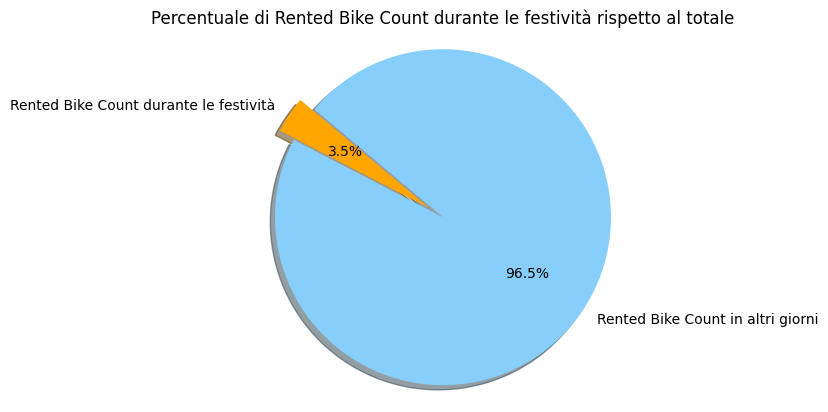

In [25]:
# # Rappresento i dati in un grafico a torta #

# Dati per il grafico
percentuale_rented_bike_count_holiday = (totale_rented_bike_count_holiday / totale_rented_bike_count) * 100
percentuale_altri_giorni = 100 - percentuale_rented_bike_count_holiday

# Etichette per le fette del grafico
labels = ['Rented Bike Count durante le festività', 'Rented Bike Count in altri giorni']

# Valori percentuali
sizes = [percentuale_rented_bike_count_holiday, percentuale_altri_giorni]

# Colori delle fette
colors = ['orange', 'lightskyblue']

# Offset della fetta "Rented Bike Count durante le festività"
explode = (0.1, 0)

# Crea il grafico a torta
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Titolo del grafico
plt.title('Percentuale di Rented Bike Count durante le festività rispetto al totale')

# Mostra il grafico
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [26]:
# # In questo caso voglio capire la correlazioni tra la colonna target 'Rented Bike Count' con le altre colonne

# Matrice di correlazione
plt.figure(figsize=(14, 14))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

<ipython-input-26-6305a3f04fdb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [27]:
# Raggruppa il df per l'ora e calcola la somma di 'Rented Bike Data' in ciascun gruppo
data_per_hour = df.groupby('Hour')['Rented Bike Count'].sum()

# Crea un grafico a linea
plt.plot(data_per_hour.index, data_per_hour.values, marker='o', linestyle='-')

# Etichette per gli assi
plt.xlabel('Ora del giorno')
plt.ylabel('Rented Bike Data')

# Titolo del grafico
plt.title('Andamento di Rented Bike Data in base all\'ora del giorno')

# Imposta l'asse x per mostrare tutti gli orari da 1 a 24
plt.xticks(range(1, 25))

# Mostra il grafico
plt.grid(True)
plt.show()

In [28]:
# La funzione limiti_range_interquartile calcola i limiti superiore e inferiore
# del range interquartile (IQR) per un dato df
def limiti_range_interquartile(data: pd.DataFrame):
    # Calcola il primo quartile (Q1) e il terzo quartile (Q3) dei dati
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)

    # Calcola l'IQR sottraendo Q1 da Q3
    iqr = (q75 - q25)
    up_limit = q75 + iqr * 1.5  # Limite superiore per valori outlier
    low_limit = q25 - iqr * 1.5  # Limite inferiore per valori outlier

    return up_limit, low_limit

# La funzione plot_generic_distribution crea un grafico a dispersione
# e visualizza i limiti superiori e inferiori
def plot_generic_distribution(data: pd.DataFrame, up_limit: float, low_limit: float):
    plt.figure(figsize=(12, 8))
    plt.scatter(np.arange(len(data)), data, alpha=0.5)
    # Aggiunge una linea per il limite superiore e una per il limite inferiore
    plt.axhline(up_limit, color='brown', linestyle='-', label='up_limit')
    plt.axhline(low_limit, color='brown', linestyle='-', label='low limit')
    plt.legend()
    plt.show()


# La funzione normal_distribution_limits calcola la media, il limite superiore e
# il limite inferiore per una distribuzione normale dei dati
def normal_distribution_limits(data: pd.DataFrame):
    # Calcola la media e la deviazione standard dei dati
    mean = data.mean()
    std = data.std()

    # Calcola il limite superiore e il limite inferiore
    up_limit = mean + std  # Terza deviazione standard positiva
    low_limit = mean - std  # Terza deviazione standard negativa

    return mean, up_limit, low_limit

# La funzione plot_normal_distribution crea un grafico a dispersione
# con linee per la media, il limite superiore e il limite inferiore della distribuzione normale
def plot_normal_distribution(data: pd.DataFrame, mean: float, up_limit: float, low_limit: float):
    plt.figure(figsize=(12, 8))
    plt.scatter(np.arange(len(data)), data, alpha=0.5)
    # Aggiunge linee per la media, il limite superiore e il limite inferiore
    plt.axhline(up_limit, color='brown', linestyle='-', label='up limit')
    plt.axhline(mean, color='r', linestyle='-', label='mean')
    plt.axhline(low_limit, color='brown', linestyle='-', label='low limit')
    plt.legend()
    plt.show()

# crea un grafico a torta per visualizzare la distribuzione percentuale dei dati
def pie(data):
    plt.figure(figsize=(6, 6))
    plt.pie(data, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()


In [ ]:
# corr_matrix = variabili_numeriche.corr()
# corr_map(corr_matrix)

In [ ]:
 #box_plots(variabili_numeriche)

In [29]:
display(variabili_numeriche)

Rented Bike Count  Temperature(°C)  Humidity(%)  Visibility (10m)  \
0                   254             -5.2           37              2000   
1                   204             -5.5           38              2000   
2                   173             -6.0           39              2000   
3                   107             -6.2           40              2000   
4                    78             -6.0           36              2000   
...                 ...              ...          ...               ...   
8460               1003              4.2           34              1894   
8461                764              3.4           37              2000   
8462                694              2.6           39              1968   
8463                712              2.1           41              1859   
8464                584              1.9           43              1909   

      Snowfall (cm)  Hour  
0               0.0    24  
1               0.0     1  
2               0.0     2  
3               0.0     3  
4               0.0     4  
...             ...   ...  
8460            0.0    19  
8461            0.0    20  
8462            0.0    21  
8463            0.0    22  
8464            0.0    23  

[8465 rows x 6 columns]

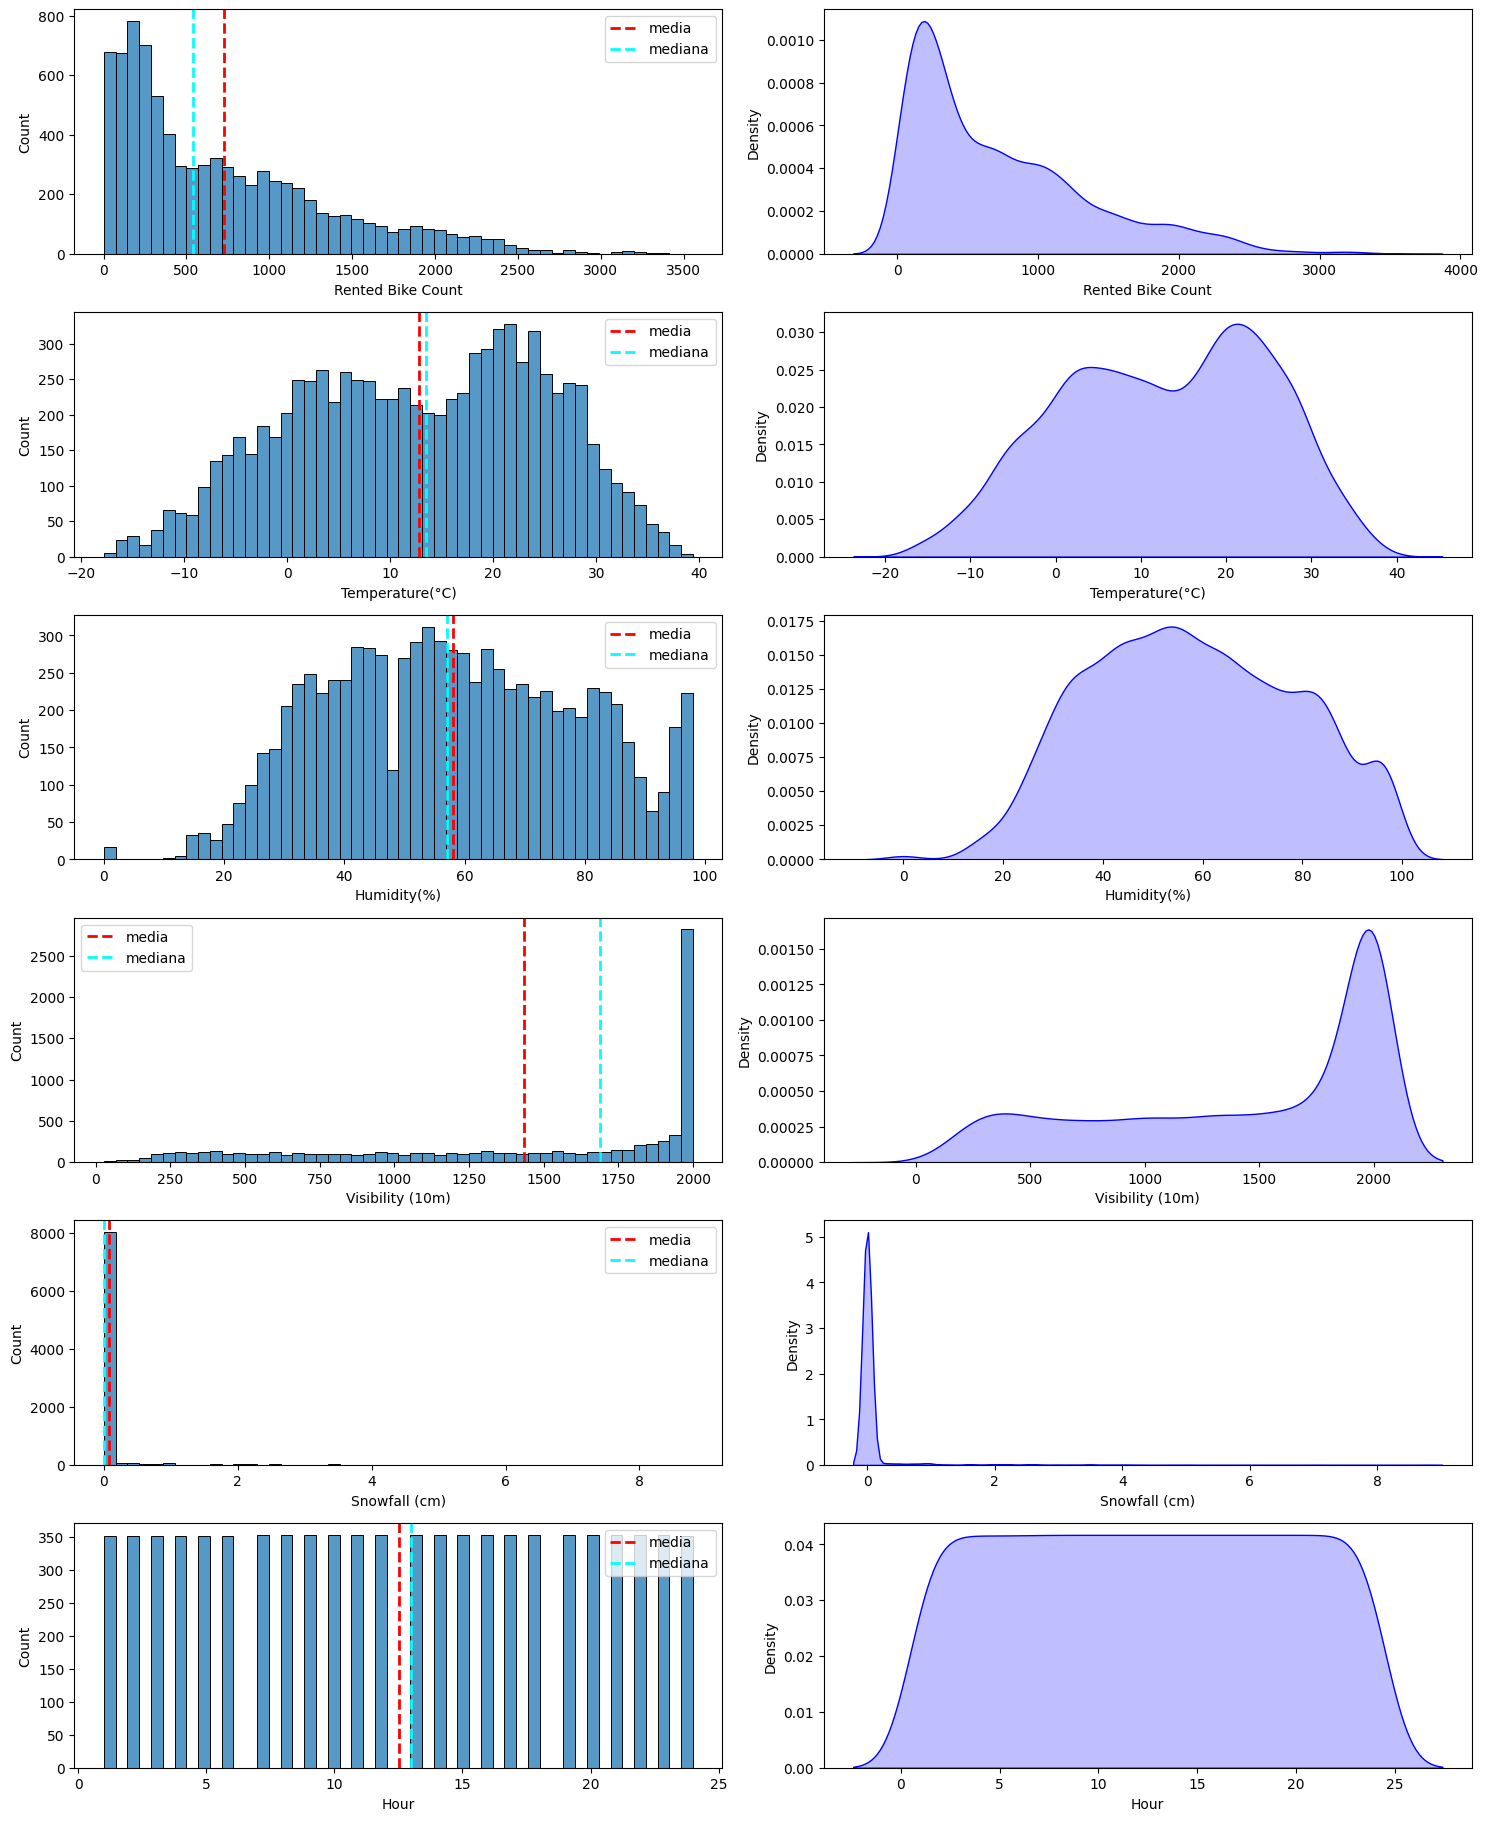

In [30]:
# Insieme di subplot per visualizzare gli istogrammi, le medie, le mediane e le curve di distribuzione dei dati per variabili numeriche.

plt.figure(figsize=(15, 30))  # Crea una figura di grandi dimensioni.

# Inizializza un indice di subplot per iterare attraverso le variabili numeriche.
n = 1

# Itera attraverso le variabili numeriche e crea subplot per ciascuna di esse.
for i in variabili_numeriche:
    plt.subplot(10, 2, n)  # Crea il subplot nella riga corrente.
    n += 1  # Incrementa l'indice di subplot.

    # Plot dell'istogramma della variabile con mediana e media evidenziate.
    sns.histplot(variabili_numeriche[i], bins=50)  # Crea l'istogramma
    plt.axvline(variabili_numeriche[i].mean(), color='red', linestyle='dashed', linewidth=2, label="media")
    plt.axvline(variabili_numeriche[i].median(), color='cyan', linestyle='dashed', linewidth=2, label="mediana")
    plt.legend()  # Aggiunge la legenda al grafico.

    plt.subplot(10, 2, n)  # Crea il secondo subplot nella riga corrente.
    n += 1  # Incrementa l'indice di subplot.

    # Plot della curva di densità dei dati.
    sns.kdeplot(data=variabili_numeriche[i], color='blue', fill=True)

# Imposta un layout compatto per i subplot.
plt.tight_layout()

# Mostra la figura contenente tutti i subplot.
plt.show()


In [35]:
# Split del df per training e testing
from sklearn.model_selection import train_test_split

x = df.drop("Rented Bike Count", axis=1).values
y = df["Rented Bike Count"].values



In [36]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.compile(loss="sparse_categorical_crossentropy", # we have sparse labels
              optimizer="sgd",
              metrics=["accuracy"])



# storico
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val,  y_val))

# plot training history
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

ValueError: ignored

In [ ]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# validazione
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# ottimizzazione
from sklearn.model_selection import GridSearchCV

# # Suddivide i dati in set di addestramento e test, allena la pipeline e calcola gli errori.
def pipeline_validation(pipeline, x, y):
    # split
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

    # trainging
    pipeline.fit(x_train, y_train)

    # predict
    y_pred = pipeline.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
    display(scores_df)
    print("\n")

# # Creazione di una curva di apprendimento per valutare le prestazioni del modello
def plot_learning_curve(pipeline, x, y):

    x_len = len(X)
    train_size_60 = int((x_len * 60) / 100)
    train_size_70 = int((x_len * 70) / 100)
    train_size_80 = int((x_len * 80) / 100)

    train_sizes = [train_size_60, train_size_70, train_size_80]

    train_size_abs, train_scores, valid_scores = learning_curve(pipeline,
                                                            x,
                                                            y,
                                                            train_sizes = train_sizes)

    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)


    scores_df = pd.DataFrame({'train': train_mean, 'validation': valid_mean})
    display(scores_df)

    plt.figure(figsize=(12, 8))
    plt.plot(train_size_abs, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.plot(train_size_abs, valid_mean, color='red', marker='o', markersize=5, label='CrossValidation Accuracy')
    plt.legend()
    plt.show()

# # Valuta le prestazioni di un modello polinomiale con diversi gradi
def pipeline_poly_validation(regressor, x, y, n):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(n - 1)
  r2_errors  = np.zeros(n - 1)


  for i in range(1,n):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = i), regressor)

    # training
    pipe.fit(x_train, y_train)

    # predict
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

# # Valuta le prestazioni di un modello Ridge con diversi valori di alpha
def test_pipeline_ridge( x, y, polyDegree, maxAlpha):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(maxAlpha - 1)
  r2_errors  = np.zeros(maxAlpha - 1)


  for i in range(1,maxAlpha):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = polyDegree), Ridge(alpha=i))

    # training
    pipe.fit(x_train, y_train)

    # predict
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)
    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

  plot_errors_curves(mse_errors, r2_errors, y_val)

# # Crea grafici degli errori (RMSE e R^2) per valutare il modello
def plot_errors_curves(mse_errors, r2_errors, y):
  max_y = np.max(y)
  min_y = np.min(y)
  plt.figure(figsize=(12, 8))
  plt.axhline(max_y, color = 'brown', linestyle = '-', label = f'max y={max_y}')
  plt.plot(np.sqrt(mse_errors), "b", label= 'rmse')
  plt.axhline(min_y, color = 'brown', linestyle = '-', label = f'min y={min_y}')
  plt.legend()
  plt.show()

  plt.figure(figsize=(12, 8))
  plt.plot(r2_errors, "g", label="r2")
  plt.legend()
  plt.show()

# # Esegue una ricerca degli iperparametri ottimali per la pipeline
def ottimization( x, y):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

  grid_parameter = {
      'polynomialfeatures__degree': [1, 2 , 3, 4],
      'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.],
      'ridge__fit_intercept': [True, False]
      }

  grid_search = GridSearchCV(pipe, grid_parameter)
  grid_search.fit(x_train, y_train)

  print("MIGLIOR SCORE: ", grid_search.best_score_)
  print("I MIGLIORI IPERPARAMETRI: ", grid_search.best_params_)

  return grid_search.best_params_["polynomialfeatures__degree"], \
         grid_search.best_params_["ridge__alpha"], \
         grid_search.best_params_["ridge__fit_intercept"]

# # Crea grafici per confrontare i valori reali e predetti e valutare le prestazioni del modello
def test_plot(test, pred):
  # andamento valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(test.size), test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(pred.size), pred, alpha=0.8, label="valori predetti")
  plt.legend()
  plt.show()

  # andamento media mobile valori reali e valori predetti
  r = 20
  maverage_y_test = pd.Series(test).rolling(r).mean()
  maverage_y_pred = pd.Series(pred).rolling(r).mean()

  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(maverage_y_test.size), maverage_y_test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(maverage_y_pred.size), maverage_y_pred, alpha=0.8, label="valori predetti")
  plt.show()

  # varianza tra valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.scatter(test, pred)
  plt.show()

# # Suddivide i dati, crea una pipeline, allena il modello, calcola gli errori e crea grafici
def test_model(x, y):
  # [1] split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  # [2] pipeline
  pipe = make_pipeline(StandardScaler(),
                      PolynomialFeatures(degree=poly_degree),
                      Ridge(alpha=ridge_alpha, fit_intercept=ridge_intercept))

  # [3] training
  pipe.fit(x_train, y_train)


  # [3] test
  y_pred = pipe.predict(x_test)


  # [4] error
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
  display(scores_df)
  print("\n")

  test_plot(y_test, y_pred)
  display(y_pred)
  display(y_test)


In [ ]:
# pipeline_validation(make_pipeline(StandardScaler(), LinearRegression()), X, Y)
# plot_learning_curve(make_pipeline(StandardScaler(), LinearRegression()), X, Y)

# pipeline_poly_validation(LinearRegression(), X, Y, 3)

In [ ]:
#from sklearn.linear_model import Ridge

# pipeline_validation(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y)
# plot_learning_curve(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y)

In [ ]:
from sklearn.linear_model import Ridge

# validazione del modello Ridge con grado polinomiale variabile da 1 a 3.
# La funzione calcolerà l'errore quadratico medio (MSE) e il coefficiente R^2
# per ciascun grado polinomiale e li stamperà a schermo
pipeline_poly_validation(Ridge(), X, Y, 4)


# serie di test su un modello Ridge con grado polinomiale fisso (3) e variando
# il parametro alpha da 1 a 9. La funzione calcolerà l'errore quadratico medio
# (MSE) e il coefficiente R^2 per ciascun valore di alpha e li stamperà a schermo.
test_pipeline_ridge(X, Y, 3, 10)


# ricerca degli iperparametri ottimali per una pipeline, includendo il grado
# polinomiale e il parametro alpha per il modello Ridge. La funzione
# restituirà i valori ottimali per questi iperparametri, che saranno
# assegnati alle variabili poly_degree, ridge_alpha e ridge_intercept.
poly_degree, ridge_alpha, ridge_intercept = ottimization(X, Y)

In [ ]:
# # Test del modello
test_model(X, Y)

test con elastic net: ratio --> scegli quali variabili categoriche e quali variabili numeriche